# Task 3: Customer Segmentation / Clustering

In [16]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Step 1: Load datasets

In [17]:
customers_df = pd.read_csv("Customers.csv")
transactions_df = pd.read_csv("Transactions.csv")

### Step 2: Preprocessing: Combine Customers and Transactions datasets

In [18]:
merged_df = transactions_df.merge(customers_df, on='CustomerID')

### Step 3: Aggregating transactional data to create customer-level features

In [19]:
customer_features = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total transaction value
    'Quantity': 'sum',    # Total quantity purchased
    'Price': 'mean',      # Average price of items purchased
}).reset_index()


### Step 4: Add profile-based features (e.g., region)

In [20]:
customer_features = customer_features.merge(customers_df[['CustomerID', 'Region']], on='CustomerID')


### Step 5: One-hot encoding for categorical variable (Region)

In [21]:
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

### Step 6: Standardize features for clustering

In [22]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))

### Step 7: Determine optimal number of clusters using Davies-Bouldin Index

In [23]:
db_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, cluster_labels)
    db_scores.append(db_index)


C:\Users\hardi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hardi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hardi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hardi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

### Step 8: Plot DB Index to find the optimal number of clusters

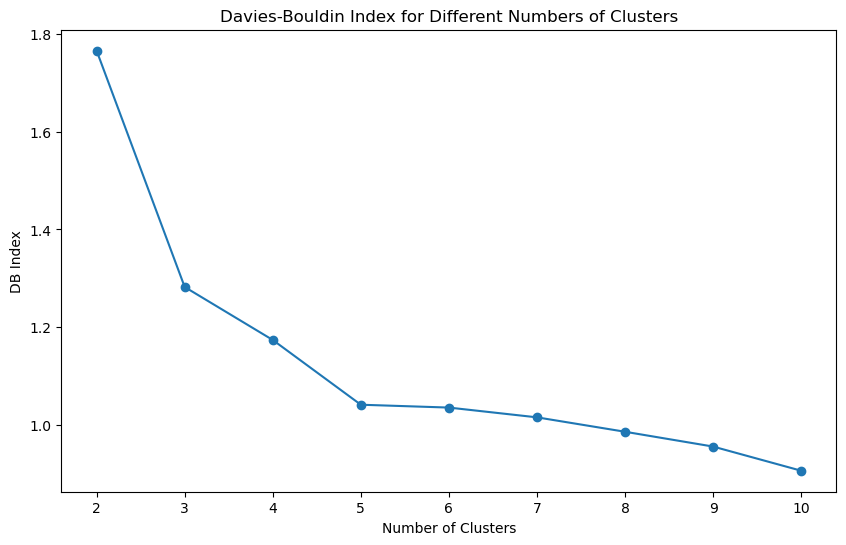

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()

### Step 9: Choose optimal number of clusters (e.g., 3 for this example)

In [32]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\hardi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hardi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Step 10: Visualize clusters using PCA for dimensionality reduction

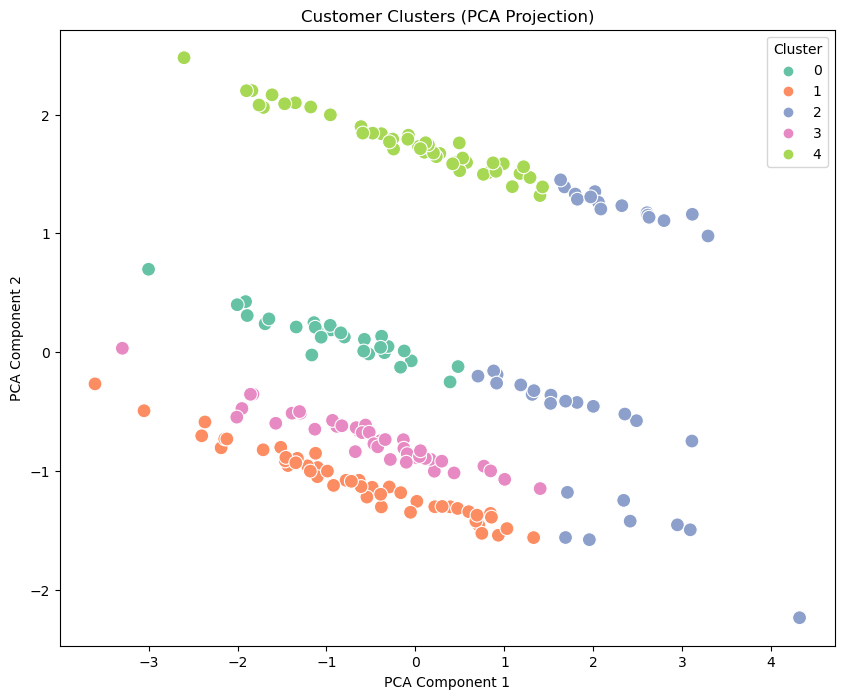

In [33]:
# Step 10: Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=customer_features['Cluster'], palette='Set2', s=100)
plt.title('Customer Clusters (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

### Step 11: Evaluate clustering performance (DB Index)

In [36]:
final_db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f"Final Davies-Bouldin Index: {final_db_index}")

Final Davies-Bouldin Index: 1.0411025338300626


### Step 12: Save results to a CSV file

In [37]:
customer_features.to_csv('Customer_Clusters.csv', index=False)